In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
from scipy.stats import zscore
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

## ZNF143-CTCF motif pairs in repeats

In [3]:
overlaps = pd.read_csv('./zhou_data/ZNF143_CTCF_motif_37bp_rmsk_overlaps.txt', sep = '\s+', header = None)
overlaps[1] = [x.replace('.', 'None') for x in overlaps[1]]

counts, names = [], []
for l in overlaps.values:
    for t in l[1].split(','):
        counts.append(l[0])
        names.append(t)
        
overlaps = pd.DataFrame({'Repeats': names, 'Overlaps': counts}).groupby(['Repeats'], as_index=False).sum()
overlaps = overlaps.sort_values(['Overlaps'], ascending = 0)
overlaps

,Repeats,Overlaps
7,SINE/B2,10517
5,None,15
4,LTR/ERVL-MaLR,12
8,SINE/B4,9
2,LTR/ERVK,3
9,SINE/ID,3
0,LINE/L1,1
1,LTR/ERV1,1
3,LTR/ERVL,1
6,SINE/Alu,1


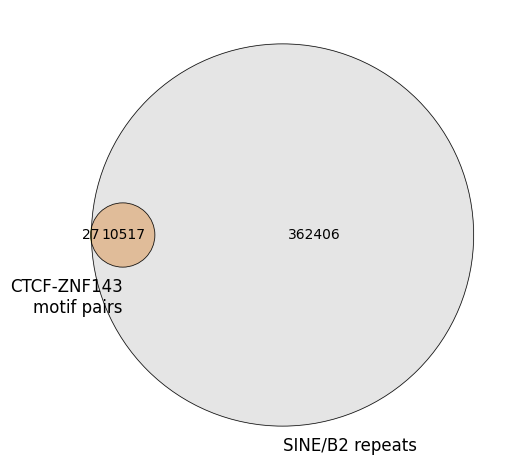

In [4]:
v = venn2([10544-10517, 372923-10517, 10517], ('CTCF-ZNF143\nmotif pairs', 'SINE/B2 repeats'))
c = venn2_circles([10544-10517, 372923-10517, 10517], lw = 0.5)
v.get_patch_by_id('10').set_color('C8')
v.get_patch_by_id('01').set_color('silver')

plt.tight_layout()
plt.show()

## Overlap of CTCF peaks (ZNF143-related and ZNF143-unrelated) with CISTROME

In [ ]:
### ZFP143 from all cell lines
mm10_znf143_peaks = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/peaks/') if '.bed' in x and 'hg19' not in x])
mm10_znf143_peaks = [x for x in mm10_znf143_peaks if 'Zfp143' in x and '.fa' not in x and 'Zhou' not in x]
mm10_ctcf_peaks = sorted(os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_mm10/'))
mm10_ctcf_peaks = [x for x in mm10_ctcf_peaks if 'CTCF' in x]

zhou_peaks = ['Zhou_CTCF_peaks_ZNF143_related.bed', 'Zhou_CTCF_peaks_ZNF143_unrelated.bed']
folder_zhou = '/DATA/users/magnitov/znf143/chipseq/public_data/zhou_data/'
folder_ctcf = '/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_mm10/'

ctcf_zhou_overlap_ctcf_fractions = []

for i in range(0, len(zhou_peaks)):
    for j in range(0, len(mm10_ctcf_peaks)):
        p = subprocess.run(["bedtools", "intersect", 
                            "-a", folder_zhou + zhou_peaks[i],
                            "-b", folder_ctcf + mm10_ctcf_peaks[j],
                            "-wa"],
                            stdout=subprocess.PIPE)
        overlap = len(np.unique(p.stdout.decode('utf-8').split('\n')))-1
        total = len(pd.read_csv(folder_zhou + zhou_peaks[i], sep = '\t', header = None))
        ctcf_zhou_overlap_ctcf_fractions.append(overlap/total)
    
ctcf_zhou_overlap_ctcf_fractions_df = pd.DataFrame(np.array(ctcf_zhou_overlap_ctcf_fractions).reshape((len(zhou_peaks), len(mm10_ctcf_peaks))),
                                                         index = [x.replace('.bed', '') for x in zhou_peaks], 
                                                         columns = ['_'.join(x.replace('.bed', '').split('_')[1:]) for x in mm10_ctcf_peaks])
ctcf_zhou_overlap_ctcf_fractions_df.to_csv('/DATA/users/magnitov/znf143/chipseq/public_data/zhou_data/CTCF_peaks_Zhou_overlap_CTCF_CISTROME.txt', sep = '\t', header = 1, index = 1)

In [17]:
ctcf_zhou_overlap_ctcf_fractions_df = pd.read_csv('./zhou_data/CTCF_peaks_Zhou_overlap_CTCF_CISTROME.txt', sep = '\t', index_col = 0)
ctcf_zhou_overlap_ctcf_fractions_df.head()

,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535768,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535761,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535754,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535747,CTCF_Cortex_GSM722631,CTCF_Bone_Marrow_GSM722636,CTCF_Cerebellum_GSM722663,CTCF_R1_Embryonic_Stem_Cell_Embryo_GSM634247,CTCF_V6.5_Embryonic_Stem_Cell_Embryo_GSM560352,CTCF_V6.5_Embryonic_Stem_Cell_Embryo_GSM560351,...,CTCF_Embryonic_Stem_Cell_Embryo_GSM841708,CTCF_Epithelium_Heart_GSM722692,CTCF_Epithelium_Kidney_GSM722698,CTCF_Epithelium_Liver_GSM722759,CTCF_Epithelium_Lung_GSM722859,CTCF_Spleen_GSM722990,CTCF_Fibroblast_Embryo_GSM723004,CTCF_Dendritic_Cell_Bone_Marrow_GSM881052,CTCF_Dendritic_Cell_Bone_Marrow_GSM881053,CTCF_Dendritic_Cell_Bone_Marrow_GSM881054
Zhou_CTCF_peaks_ZNF143_related,0.317255,0.296824,0.311859,0.317399,0.341714,0.272077,0.387360,0.139779,0.227330,0.097371,...,0.237581,0.393799,0.459768,0.518830,0.367433,0.352613,0.357325,0.285817,0.272041,0.269523
Zhou_CTCF_peaks_ZNF143_unrelated,0.974500,0.975214,0.971401,0.980219,0.994042,0.974261,0.991897,0.636559,0.947569,0.603432,...,0.959485,0.996425,0.997855,0.997617,0.994042,0.992374,0.969971,0.987607,0.973785,0.979028


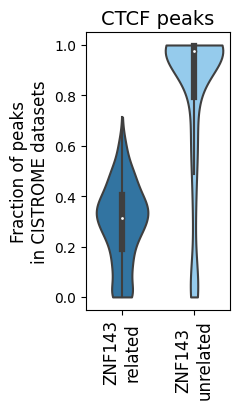

In [19]:
plt.figure(figsize = (2.5, 4.2))

plt.title('CTCF peaks', fontsize = 14)
sns.violinplot(data = [ctcf_zhou_overlap_ctcf_fractions_df.transpose()['Zhou_CTCF_peaks_ZNF143_related'],
                    ctcf_zhou_overlap_ctcf_fractions_df.transpose()['Zhou_CTCF_peaks_ZNF143_unrelated']],
            palette = ['C0', 'lightskyblue'], fliersize = 0, zorder = 10, cut = 0)
plt.ylim((-0.05, 1.05))
plt.xticks([0, 1], ['ZNF143\nrelated', 'ZNF143\nunrelated'], rotation = 90, fontsize = 12)
plt.ylabel('Fraction of peaks\nin CISTROME datasets', fontsize = 12)

plt.tight_layout()
plt.show()

## GC bias of ChIP-seq reads

In [20]:
gc_bias_wt_ctcf_rep1 = pd.read_csv('./zhou_data/gc_bias_WT_CTCF_rep1.txt', sep = '\s+', header = None)
gc_bias_wt_ctcf_rep2 = pd.read_csv('./zhou_data/gc_bias_WT_CTCF_rep2.txt', sep = '\s+', header = None)
gc_bias_ko_ctcf_rep1 = pd.read_csv('./zhou_data/gc_bias_KO_CTCF_rep1.txt', sep = '\s+', header = None)
gc_bias_ko_ctcf_rep2 = pd.read_csv('./zhou_data/gc_bias_KO_CTCF_rep2.txt', sep = '\s+', header = None)

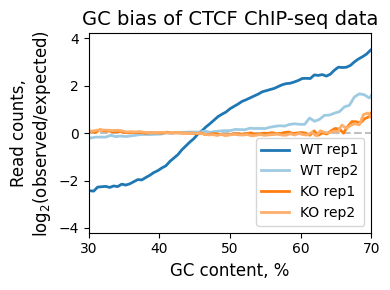

In [21]:
plt.figure(figsize = (4, 3))
plt.title('GC bias of CTCF ChIP-seq data', fontsize = 14)

plt.plot(np.linspace(0, 100, len(gc_bias_wt_ctcf_rep1)), np.log2(gc_bias_wt_ctcf_rep1[2]), 
         label = 'WT rep1', lw = 2, color = 'C0')
plt.plot(np.linspace(0, 100, len(gc_bias_wt_ctcf_rep2)), np.log2(gc_bias_wt_ctcf_rep2[2]), 
         label = 'WT rep2', lw = 2, color = '#9ecae2')
plt.plot(np.linspace(0, 100, len(gc_bias_ko_ctcf_rep1)), np.log2(gc_bias_ko_ctcf_rep1[2]), 
         label = 'KO rep1', lw = 2, color = 'C1')
plt.plot(np.linspace(0, 100, len(gc_bias_ko_ctcf_rep2)), np.log2(gc_bias_ko_ctcf_rep2[2]), 
         label = 'KO rep2', lw = 2, color = '#fdae6b')
plt.axhline(0, ls = '--', color = 'silver', zorder = 0)
plt.xlim((30, 70))
plt.ylim((-4.2, 4.2))
plt.xlabel('GC content, %', fontsize = 12)
plt.ylabel('Read counts,\nlog$_2$(observed/expected)', fontsize = 12)
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

## Motif scores in ZNF143-related and ZNF143-unrelated peaks

In [22]:
regions = pd.read_csv('./zhou_data/Zhou_CTCF_peaks_both.sorted_deeptools.txt', sep = '\t')
regions = regions[['#chrom', 'start', 'end', 'deepTools_group']]
regions.head()

,#chrom,start,end,deepTools_group
0,chr2,30078127,30078717,ZNF143 related (N=27801)
1,chr10,127511994,127512368,ZNF143 related (N=27801)
2,chr5,120103390,120103644,ZNF143 related (N=27801)
3,chr18,76378061,76378266,ZNF143 related (N=27801)
4,chr15,36792329,36794354,ZNF143 related (N=27801)


In [23]:
peaks_related_scores = pd.read_csv('./zhou_data/CTCF_motif_scores.Zhou_CTCF_peaks_ZNF143_related.bed', sep = '\t', header = None)
peaks_unrelated_scores = pd.read_csv('./zhou_data/CTCF_motif_scores.Zhou_CTCF_peaks_ZNF143_unrelated.bed', sep = '\t', header = None)

peaks_with_scores = pd.concat([peaks_related_scores, peaks_unrelated_scores])
peaks_with_scores.index = np.arange(len(peaks_with_scores))
peaks_with_scores.columns = ['#chrom', 'start', 'end', 'score']
peaks_with_scores['start'] = [int(x) for x in peaks_with_scores['start']]
peaks_with_scores['end'] = [int(x) for x in peaks_with_scores['end']]
peaks_with_scores.head()

,#chrom,start,end,score
0,chr1,3311421,3311686,8.407228
1,chr1,4492017,4492545,5.784570
2,chr1,4571649,4572094,6.127637
3,chr1,4681955,4682153,8.176738
4,chr1,4785439,4785737,2.597920


In [24]:
gw_ctcf_motifs = pd.read_csv('./zhou_data/CTCF_motifs.mm10.bed', sep = '\t', header = None)
gw_ctcf_motifs_average_score = np.mean(gw_ctcf_motifs[7])
gw_ctcf_motifs_min_score = np.min(gw_ctcf_motifs[7])
gw_ctcf_motifs_max_score = np.max(gw_ctcf_motifs[7])
gw_ctcf_motifs_average_score, gw_ctcf_motifs_min_score, gw_ctcf_motifs_max_score

(10.14962361310244, 7.55150117194275, 23.6410484907226)

In [25]:
regions_with_scores = regions.merge(peaks_with_scores, on = ['#chrom', 'start', 'end'])
regions_with_scores['zscore'] = zscore(regions_with_scores['score'])
regions_with_scores['gw_norm_score'] = regions_with_scores['score']/np.mean(gw_ctcf_motifs[7])
regions_with_scores['gw_scaled'] = (regions_with_scores['score']-np.mean(gw_ctcf_motifs[7]))/np.std(gw_ctcf_motifs[7])
regions_with_scores.head()

,#chrom,start,end,deepTools_group,score,zscore,gw_norm_score,gw_scaled
0,chr2,30078127,30078717,ZNF143 related (N=27801),12.306579,0.681667,1.212516,0.903264
1,chr10,127511994,127512368,ZNF143 related (N=27801),6.298620,-0.233436,0.620577,-1.612676
2,chr5,120103390,120103644,ZNF143 related (N=27801),-0.545526,-1.275904,-0.053748,-4.478784
3,chr18,76378061,76378266,ZNF143 related (N=27801),2.968516,-0.740662,0.292475,-3.007217
4,chr15,36792329,36794354,ZNF143 related (N=27801),4.278163,-0.541183,0.421510,-2.458779


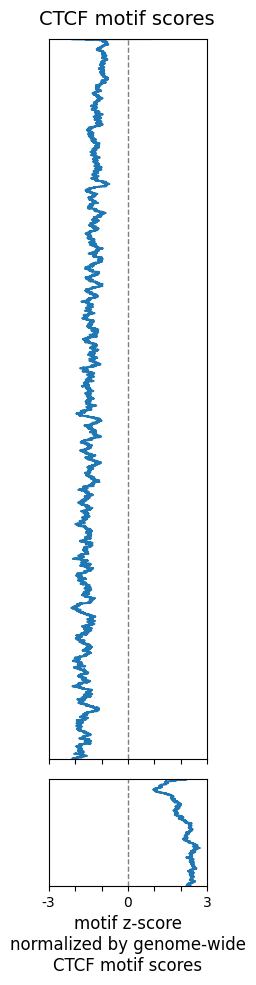

In [26]:
fig = plt.figure(figsize = (2, 10))

plt.suptitle('CTCF motif scores', fontsize = 14)

gs1 = fig.add_gridspec(nrows = 2, ncols = 1, height_ratios=(27.242, 4.069))

ax1 = fig.add_subplot(gs1[0])
plt.plot(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 related (N=27801)'].rolling(window = 200, min_periods = 1).mean()['gw_scaled'],
         np.arange(len(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 related (N=27801)']))[::-1], lw = 1.5, color = 'C0')
plt.ylim((0, len(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 related (N=27801)'])))
plt.axvline(0, ls = '--', color = 'grey', lw = 1)
plt.xlim((-3, 3))
plt.xticks([-3, -2, -1, 0, 1, 2, 3], [])
plt.yticks([], [])

ax2 = fig.add_subplot(gs1[1])
plt.plot(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 unrelated (N=4196)'].rolling(window = 200, min_periods = 1).mean()['gw_scaled'],
         np.arange(len(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 unrelated (N=4196)']))[::-1], lw = 1.5, color = 'C0')
plt.ylim((0, len(regions_with_scores[regions_with_scores['deepTools_group'] == 'ZNF143 unrelated (N=4196)'])))
plt.axvline(0, ls = '--', color = 'grey', lw = 1)
plt.xlim((-3, 3))
plt.xticks([-3, -2, -1, 0, 1, 2, 3], [-3, '', '', 0, '', '', 3])
plt.xlabel('motif z-score\nnormalized by genome-wide\nCTCF motif scores', fontsize = 12)
plt.yticks([], [])

plt.tight_layout()
plt.show()